In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import tree, model_selection, metrics, datasets, linear_model
import seaborn as sns

In [2]:
data = pd.read_csv('Nigeria.csv')

## Remove unused attributes
useless_attributes = ['row_id','source','clean_country_name','clean_adm2','clean_adm3',
                      'activity_id','scheme_id', 'wpdx_id', 'notes', 'orig_lnk',
                      'photo_lnk','country_id', 'data_lnk', 'public_data_source',
                      'latest_record', 'location_id','lat_deg_original',
                      'lon_deg_original','country_name','adm2', 'adm3',
                      'clean_country_id','management','created_timestamp', 
                      'updated_timestamp', 'New Georeferenced Column ',
                      'lat_lon_deg', 'count', 'converted','water_source',
                      'water_tech', 'adm1','report_date','status','subjective_quality']

for i in useless_attributes:
    data.drop(columns = i, inplace = True)
    
## Remove columns with too many missing data
nulldata = data.isnull().sum()
missing_cols = nulldata[nulldata > len(data)/2].index

for i in missing_cols:
    data.drop(columns = i, inplace = True)

In [3]:
## Recategorize data
# Region
region_data = pd.read_csv('recode_region.csv')
region_dict = {}
for i in range(len(region_data)):
    region_dict[region_data['clean_adm1'][i]] = region_data['clean_adm1 recoded'][i]
data['region'] = data['clean_adm1'].apply(lambda x: region_dict[x])
data.drop(columns = 'clean_adm1',inplace = True)

# Pay
data['pay'] = data['pay'].apply(lambda x: x if x == 'No' else 'Yes')

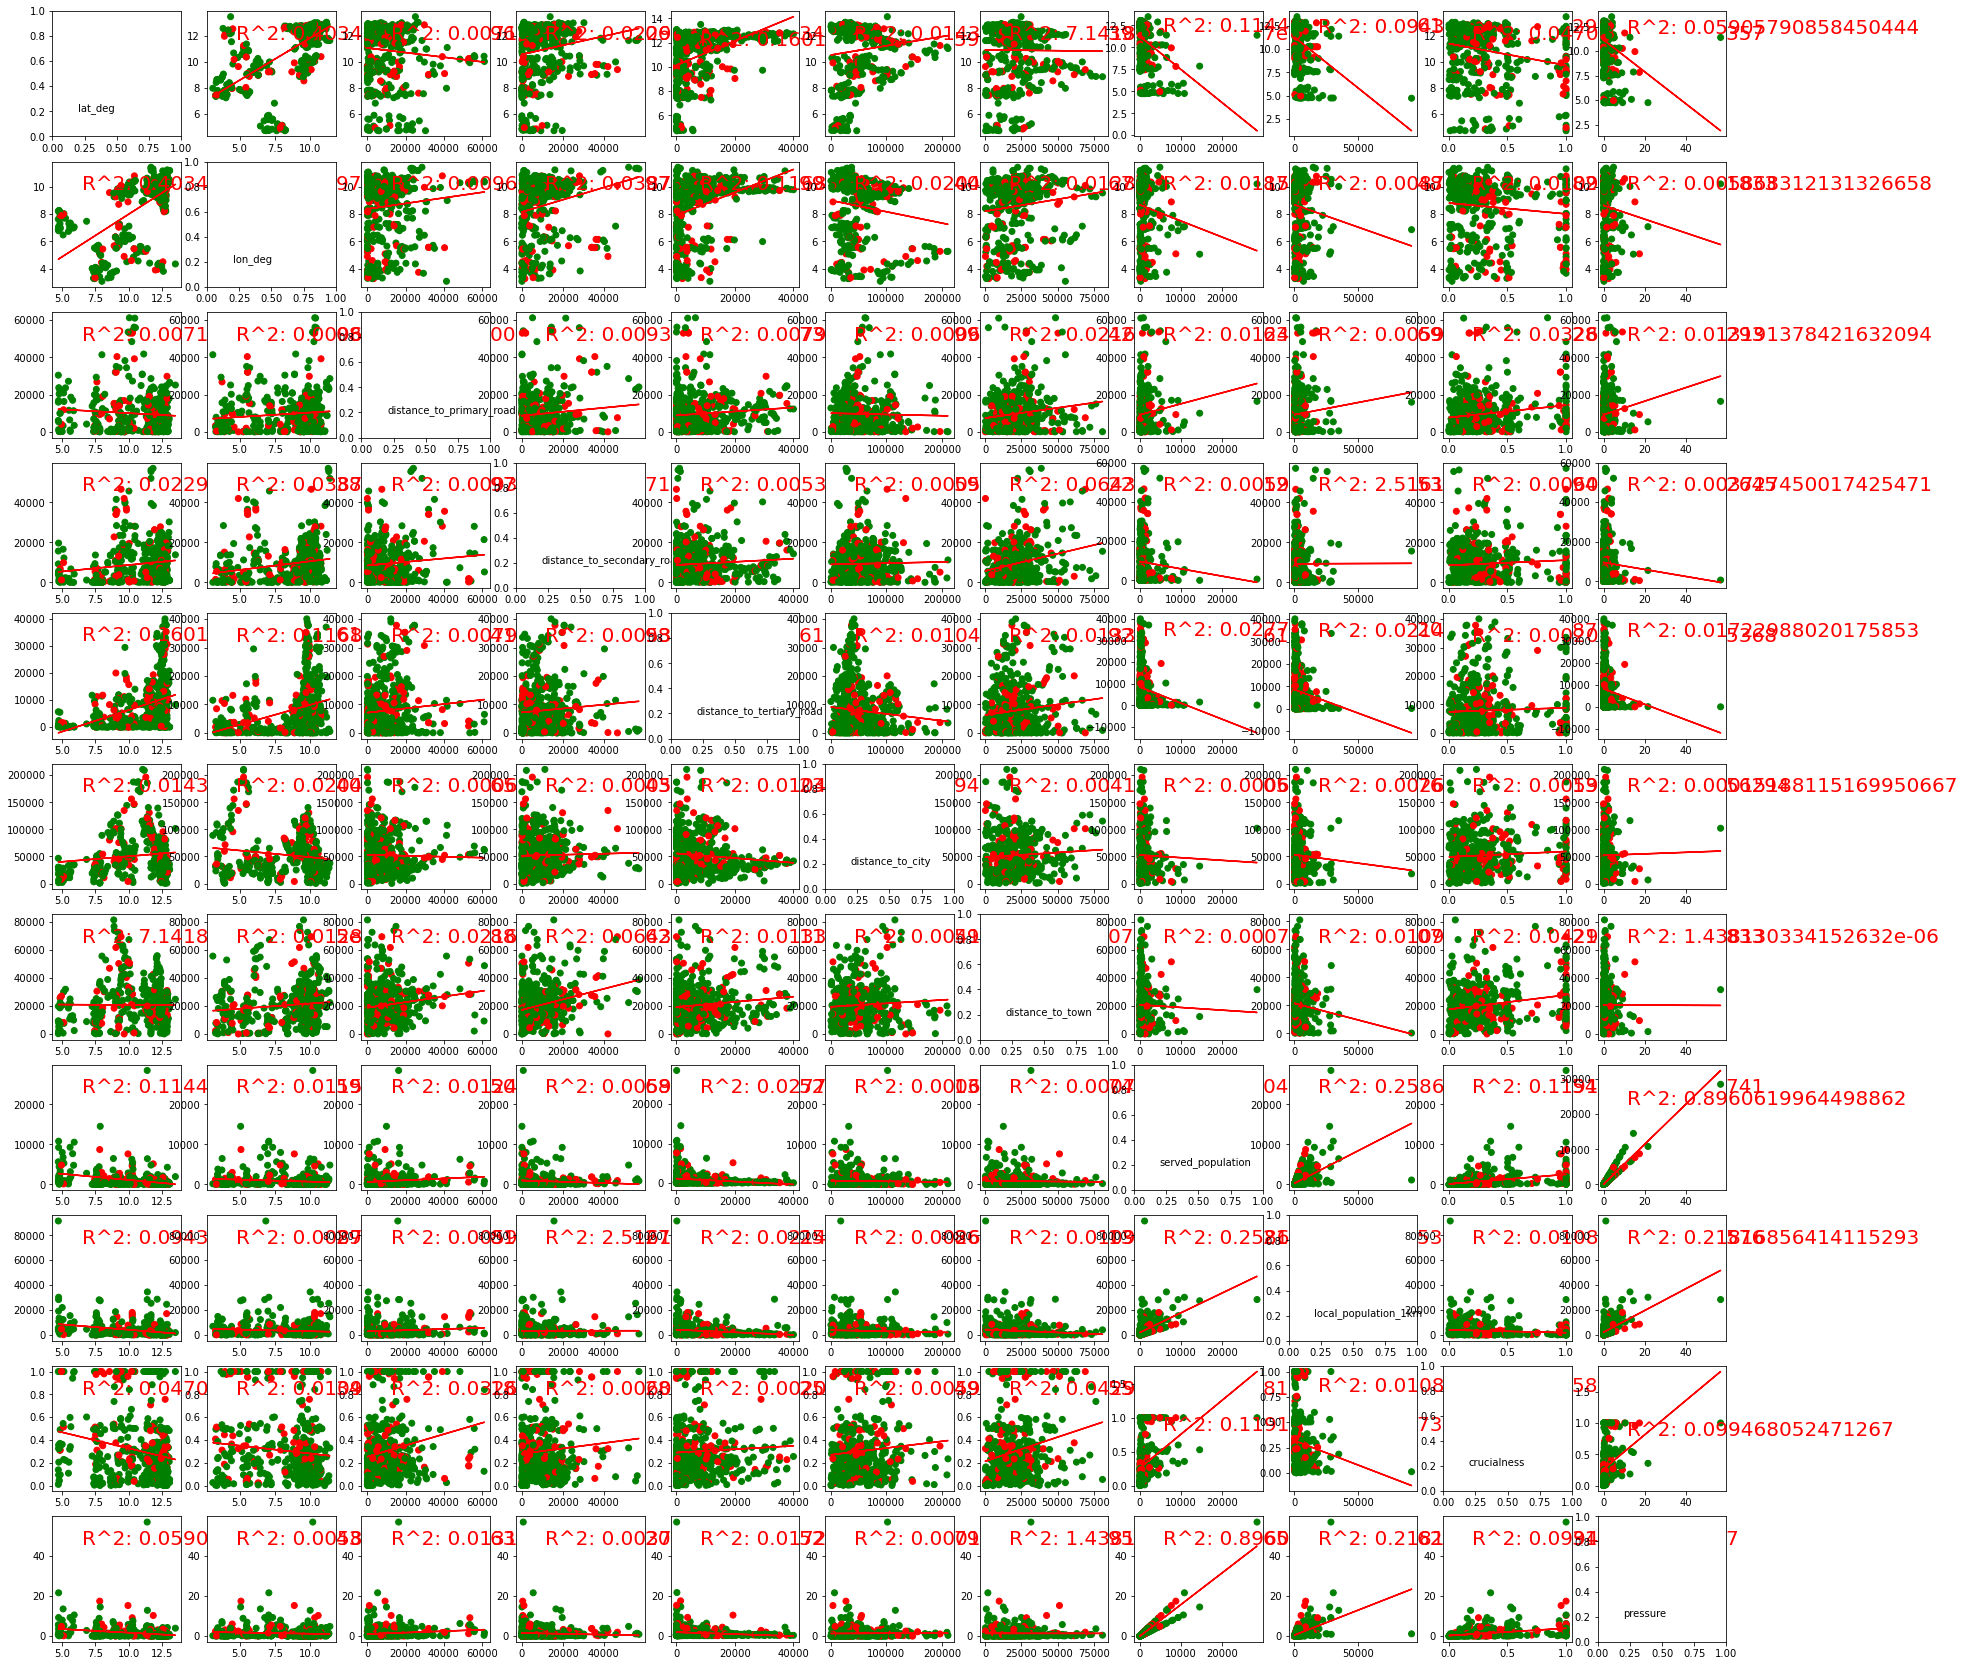

In [4]:
# Multivariate Analysis
conti_var = ['lat_deg', 'lon_deg','distance_to_primary_road',
             'distance_to_secondary_road', 'distance_to_tertiary_road',
             'distance_to_city', 'distance_to_town','served_population',
             'local_population_1km', 'crucialness', 'pressure']

plt.figure(figsize = (30,30))

data_sample = data.sample(n = 1000)
data_sample.dropna(inplace = True)
data_cont = data_sample[conti_var]
names = data_cont.columns

target = data_sample['status_id'].apply(lambda x: 1 if x == 'Yes' else 0)
colors = ['red','green']
y_color = [colors[i] for i in target]
r2_mat = np.zeros(len(conti_var)**2).reshape(len(conti_var),-1)
r2_mat = pd.DataFrame(data = r2_mat, index = conti_var, columns = conti_var)

for i in range(len(names)):
    for j in range(len(names)):
        ind = i*len(names) + j + 1
        plt.subplot(len(names),len(names),ind)
        if i == j:
            plt.xlim(0,1)
            plt.ylim(0,1)
            plt.text(0.2,0.2,names[i],fontsize = 10)
        else:
            lin_reg = linear_model.LinearRegression()
            lin_reg.fit(data_cont[[names[j]]].values,data_cont[names[i]].values)
            plt.scatter(data_cont[names[j]],data_cont[names[i]],color = y_color)
            y_pred = lin_reg.predict(data_cont[[names[j]]].values)
            plt.plot(data_cont[names[j]],y_pred,color = 'red')
            r_square = metrics.explained_variance_score(data_cont[names[i]].values,y_pred)
            r2_mat.iloc[i,j] = r_square
            plt.text(min(data_cont[names[j]]) + 0.2*(max(data_cont[names[j]])-min(data_cont[names[j]])),
                     max(data_cont[names[i]]) - 0.2*(max(data_cont[names[i]])-min(data_cont[names[i]])),
                     "R^2: " + str(r_square), fontsize = 20, c = 'red'
                    )


In [5]:
r2_mat

,lat_deg,lon_deg,distance_to_primary_road,distance_to_secondary_road,distance_to_tertiary_road,distance_to_city,distance_to_town,served_population,local_population_1km,crucialness,pressure
lat_deg,0.000000,0.403486,0.007149,0.022954,0.160102,0.014372,0.000071,0.114420,0.094323,0.047012,0.059058
lon_deg,0.403486,0.000000,0.009626,0.038775,0.116877,0.020431,0.012819,0.011521,0.008721,0.010962,0.005868
distance_to_primary_road,0.007149,0.009626,0.000000,0.009320,0.007946,0.000605,0.021694,0.012446,0.005960,0.032645,0.013191
distance_to_secondary_road,0.022954,0.038775,0.009320,0.000000,0.005395,0.000584,0.064386,0.005987,0.000003,0.006060,0.003727
distance_to_tertiary_road,0.160102,0.116877,0.007946,0.005395,0.000000,0.010409,0.013360,0.027790,0.021466,0.002079,0.017230
distance_to_city,0.014372,0.020431,0.000605,0.000584,0.010409,0.000000,0.004184,0.000674,0.002693,0.005978,0.000152
distance_to_town,0.000071,0.012819,0.021694,0.064386,0.013360,0.004184,0.000000,0.000725,0.010997,0.042928,0.000001
served_population,0.114420,0.011521,0.012446,0.005987,0.027790,0.000674,0.000725,0.000000,0.258629,0.119137,0.896062
local_population_1km,0.094323,0.008721,0.005960,0.000003,0.021466,0.002693,0.010997,0.258629,0.000000,0.010884,0.218169
crucialness,0.047012,0.010962,0.032645,0.006060,0.002079,0.005978,0.042928,0.119137,0.010884,0.000000,0.099468


In [6]:
## High correlation between pressure and served_population - Drop pressure
data.drop(columns = 'pressure', inplace = True)

In [7]:
## Chi-Square Test & recode
cat_var = ['water_source_clean','water_source_category', 'water_tech_clean',
           'water_tech_category','facility_type', 'install_year',
           'management_clean', 'pay','usage_capacity', 'is_urban',
           'cluster_size', 'region']

In [8]:
## Build Contingency Table
chi_sq_data = data[cat_var[0:2]]
chi_sq_data
rows = chi_sq_data[cat_var[0]].unique()
cols = chi_sq_data[cat_var[1]].unique()

contin_table = np.zeros(len(rows)*len(cols)).reshape(len(rows),len(cols))
for i in range(len(chi_sq_data)):
    row = np.where(rows == chi_sq_data[cat_var[0]][i])[0][0]
    col = np.where(cols == chi_sq_data[cat_var[1]][i])[0][0]
    contin_table[row][col] += 1

In [9]:
contin_table

array([[2.559e+04, 0.000e+00],
       [1.971e+03, 0.000e+00],
       [0.000e+00, 1.596e+03],
       [9.000e+00, 0.000e+00]])

In [10]:
print(data['facility_type'].value_counts())

Improved    29157
Unknown         9
Name: facility_type, dtype: int64


In [11]:
data['water_tech_category'].value_counts()

Hand Pump          20581
Mechanized Pump     8165
Tapstand              25
Name: water_tech_category, dtype: int64

In [12]:
data['water_tech_category'] = data['water_tech_category'].apply(lambda x: x if x == 'Hand Pump' else 'Mechanized Pump & Tapstand')
data['water_tech_category'].value_counts()

Hand Pump                     20581
Mechanized Pump & Tapstand     8585
Name: water_tech_category, dtype: int64

In [13]:
data['management_clean'].value_counts()

Community Management                     9507
Direct Government Operation              8427
Other                                    2536
School Management                         419
Health Care Facility                      101
Private Operator/Delegated Management      48
Other Institutional Management             33
Name: management_clean, dtype: int64

In [14]:
def management_recode(x):
    if x == 'School Management' or x == 'Health Care Facility':
        return 'Community Management'
    elif x == 'Private Operator/Delegated Management' or x == 'Other Institutional Management':
        return 'Other'
    else:
        return x
data['management_clean'] = data['management_clean'].apply(lambda x: management_recode(x))
data['management_clean'].value_counts()

Community Management           10027
Direct Government Operation     8427
Other                           2617
Name: management_clean, dtype: int64

In [15]:
data['usage_capacity'].value_counts()

500.0     20706
1000.0     8165
250.0        17
Name: usage_capacity, dtype: int64

In [16]:
data['usage_capacity'] = data['usage_capacity'].apply(lambda x: "1000" if x == 1000 else "250&500")
data['usage_capacity'].value_counts()

250&500    21001
1000        8165
Name: usage_capacity, dtype: int64

In [17]:
data['is_urban'].value_counts()

False    23659
True      5507
Name: is_urban, dtype: int64

In [18]:
data['cluster_size'].value_counts()
data['cluster_size'] = data['cluster_size'].apply(lambda x: str(x) if x <= 2 else ">=3")

In [19]:
data['cluster_size'].value_counts()

1      26630
2       1979
>=3      557
Name: cluster_size, dtype: int64

In [20]:
data.drop(columns = 'water_source_clean', inplace = True)
data.drop(columns = 'water_tech_clean', inplace = True)
data.drop(columns = 'facility_type', inplace = True)
data.drop(columns = 'install_year', inplace = True)
data.dropna(subset = ['served_population','local_population_1km','crucialness'],
            inplace = True)
data.fillna('Missing',inplace = True)

In [23]:
# Binarize Data
cat_var1 = ['water_source_category', 'water_tech_category','management_clean', 
            'pay','usage_capacity', 'is_urban','cluster_size', 'region']
conti_var1 = ['lat_deg', 'lon_deg','distance_to_primary_road',
             'distance_to_secondary_road', 'distance_to_tertiary_road',
             'distance_to_city', 'distance_to_town','served_population',
             'local_population_1km', 'crucialness']
dummies = pd.get_dummies(data[cat_var1],drop_first = True)

In [24]:
## Data for fitting model
x = pd.concat([dummies,data[conti_var1]],axis = 1).values
y = data['status_id'].apply(lambda x: 1 if x == 'No' else 0).values

In [37]:
#### Decision Tree Model
## Fit Model (Full Tree)
tree_clf = tree.DecisionTreeClassifier(criterion = 'gini',random_state = 2021)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size = 0.4,
                                                                    random_state = 2021)

tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [ ]:
#plt.figure(figsize = (40,40))
#tree.plot_tree(tree_clf,filled = True)

In [38]:
y_pred = tree_clf.predict(x_test)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

[[6108 1367]
 [1259 2171]]
0.7591930307198532
0.613623516110797
0.6329446064139942


In [40]:
perf_matrics = ['Accuracy','Precision','Recall']

[[0.7802842732691426, 0.6752542372881356, 0.5807580174927114], [0.7843191196698762, 0.6746597537265068, 0.606997084548105], [0.7893626776707933, 0.6886446886446886, 0.6029154518950437], [0.7911966987620358, 0.7019264448336252, 0.5842565597667638], [0.7900045850527281, 0.6911468812877264, 0.6008746355685132], [0.7912883998165979, 0.7066618911174785, 0.5752186588921283], [0.7957817514901422, 0.7236891037560431, 0.5673469387755102], [0.7954149472718937, 0.7319148936170212, 0.5516034985422741], [0.7923888124713434, 0.725968992248062, 0.546064139941691], [0.7892709766162311, 0.7235387045813586, 0.5341107871720117]]


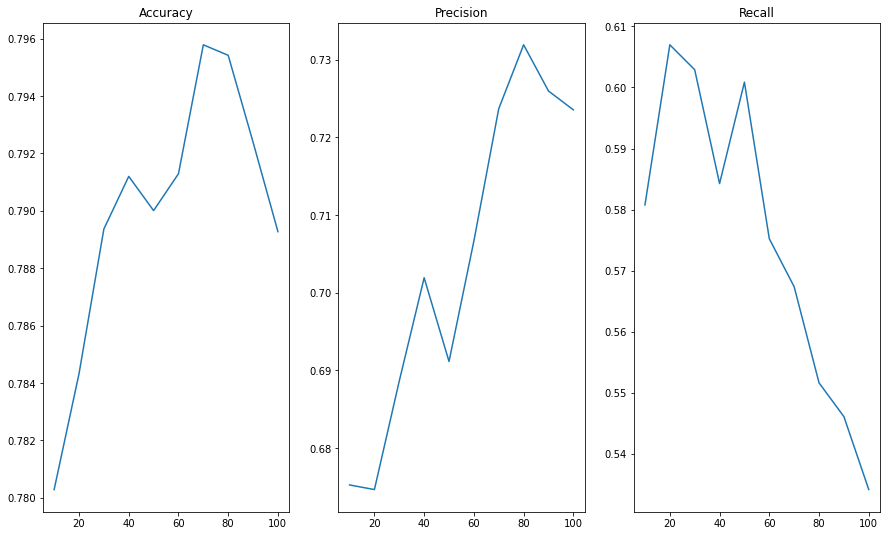

In [42]:
## Pre-Pruning (Minimum Leaves):
tree_perf = []
for i in range(10,101,10):
    tree_clf = tree.DecisionTreeClassifier(criterion = 'gini',
                                           min_samples_leaf = i,
                                           random_state = 2021)
    tree_clf.fit(x_train, y_train)
    # plt.figure(figsize = (40,40))
    # tree.plot_tree(tree_clf,filled = True)
    
    y_pred = tree_clf.predict(x_test)
    # print(metrics.confusion_matrix(y_test,y_pred))
    # print(metrics.accuracy_score(y_test,y_pred))
    # print(metrics.precision_score(y_test,y_pred))
    # print(metrics.recall_score(y_test,y_pred))
    tree_perf.append([metrics.accuracy_score(y_test,y_pred),
                      metrics.precision_score(y_test,y_pred),
                      metrics.recall_score(y_test,y_pred)])

print(tree_perf)
perf = np.array(tree_perf)
plt.figure(figsize = (15,9))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(np.arange(10,101,10),perf[:,i])
    plt.title(perf_matrics[i])
    plt.xlabel('Minumum Leaves')

[[0.7580009170105456, 0.6165635131152373, 0.6099125364431487], [0.7617606602475928, 0.6287128712871287, 0.5924198250728863], [0.7621274644658413, 0.6321112515802781, 0.5830903790087464], [0.7649701971572673, 0.6346691519105312, 0.5956268221574345], [0.7705639614855571, 0.6482428115015975, 0.5915451895043732], [0.7752407152682256, 0.6580561834032935, 0.5941690962099125], [0.7790921595598349, 0.6663408276311502, 0.5962099125364432], [0.7797340669417698, 0.6647435897435897, 0.60466472303207], [0.7808344795965153, 0.6668806161745828, 0.6058309037900874], [0.7811095827602017, 0.6650838873061096, 0.612536443148688]]


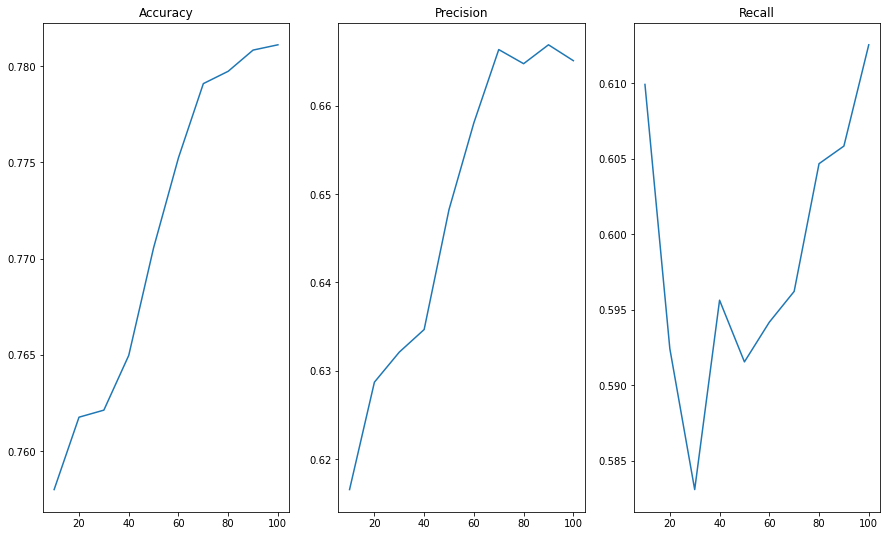

In [41]:
## Pre-Pruning (Minimum split):
tree_perf2 = []
for i in range(10,101,10):
    tree_clf = tree.DecisionTreeClassifier(criterion = 'gini',
                                           min_samples_split = i,
                                           random_state = 2021)
    tree_clf.fit(x_train, y_train)
    # plt.figure(figsize = (40,40))
    # tree.plot_tree(tree_clf,filled = True)
    
    y_pred = tree_clf.predict(x_test)
    # print(metrics.confusion_matrix(y_test,y_pred))
    # print(metrics.accuracy_score(y_test,y_pred))
    # print(metrics.precision_score(y_test,y_pred))
    # print(metrics.recall_score(y_test,y_pred))
    tree_perf2.append([metrics.accuracy_score(y_test,y_pred),
                      metrics.precision_score(y_test,y_pred),
                      metrics.recall_score(y_test,y_pred)])
    
print(tree_perf2)
perf2 = np.array(tree_perf2)
plt.figure(figsize = (15,9))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(np.arange(10,101,10),perf2[:,i])
    plt.title(perf_matrics[i])
    plt.xlabel('Minumum Split')

[[0.7926639156350298, 0.7226666666666667, 0.5530612244897959], [0.7922971114167813, 0.7305104867431738, 0.5381924198250729], [0.7780834479596516, 0.6610331632653061, 0.6043731778425656], [0.7698303530490601, 0.6359338061465721, 0.6274052478134111], [0.7686382393397524, 0.6288718385905087, 0.6451895043731778], [0.7644199908298945, 0.6218511180300028, 0.6405247813411079]]


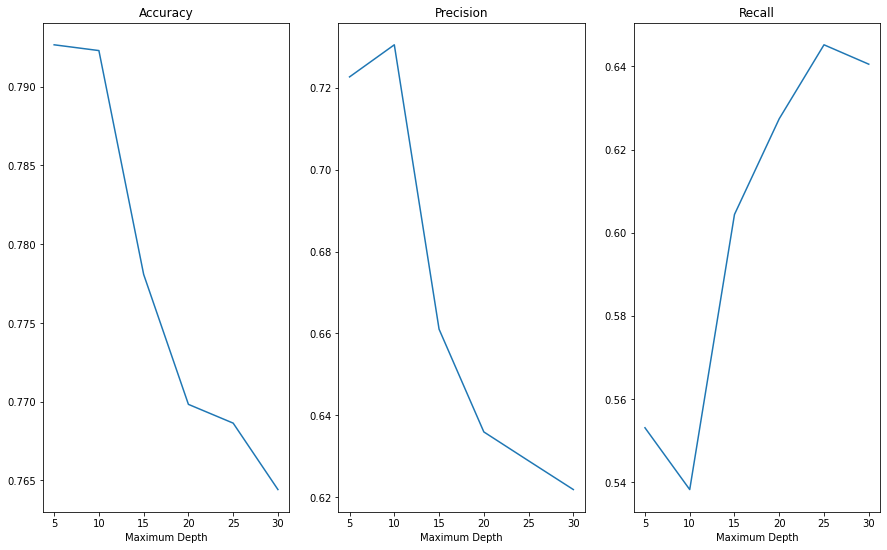

In [43]:
## Pre-Pruning (Max Depth):
tree_perf3 = []
for i in range(5,31,5):
    tree_clf = tree.DecisionTreeClassifier(criterion = 'gini',
                                           max_depth= i,
                                           random_state = 2021)
    tree_clf.fit(x_train, y_train)
    # plt.figure(figsize = (40,40))
    # tree.plot_tree(tree_clf,filled = True)
    
    y_pred = tree_clf.predict(x_test)
    # print(metrics.confusion_matrix(y_test,y_pred))
    # print(metrics.accuracy_score(y_test,y_pred))
    # print(metrics.precision_score(y_test,y_pred))
    # print(metrics.recall_score(y_test,y_pred))
    tree_perf3.append([metrics.accuracy_score(y_test,y_pred),
                      metrics.precision_score(y_test,y_pred),
                      metrics.recall_score(y_test,y_pred)])

print(tree_perf3)
perf3 = np.array(tree_perf3)
plt.figure(figsize = (15,9))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(np.arange(5,31,5),perf3[:,i])
    plt.title(perf_matrics[i])
    plt.xlabel('Maximum Depth')

In [44]:
## Post Pruning (Cost Complexity Penalty)
## Fit Model (Full Tree)
tree_clf = tree.DecisionTreeClassifier(criterion = 'gini',
                                        random_state = 2021)


tree_clf.fit(x_train, y_train)
# plt.figure(figsize = (40,40))
# tree.plot_tree(tree_clf,filled = True)
tree_obj = tree_clf.tree_

y_pred = tree_clf.predict(x_test)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

## Post Pruning (Using test_data)
path = tree_clf.cost_complexity_pruning_path(x_train, y_train)
alphas = path['ccp_alphas']

accuracy_train, accuracy_test = [], []
precision_train, precision_test = [], []
recall_train, recall_test = [], []
for alpha in alphas:
    tree_ccp = tree.DecisionTreeClassifier(criterion = 'gini',
                                           random_state = 2021,
                                           ccp_alpha=alpha)
    tree_ccp.fit(x_train,y_train)
    y_train_pred = tree_ccp.predict(x_train)
    y_pred = tree_ccp.predict(x_test)
    
    accuracy_train.append(metrics.accuracy_score(y_train,y_train_pred))
    recall_train.append(metrics.recall_score(y_train,y_train_pred))
    
    accuracy_test.append(metrics.accuracy_score(y_test,y_pred))
    recall_test.append(metrics.recall_score(y_test,y_pred))

[[6108 1367]
 [1259 2171]]
0.7591930307198532
0.613623516110797
0.6329446064139942


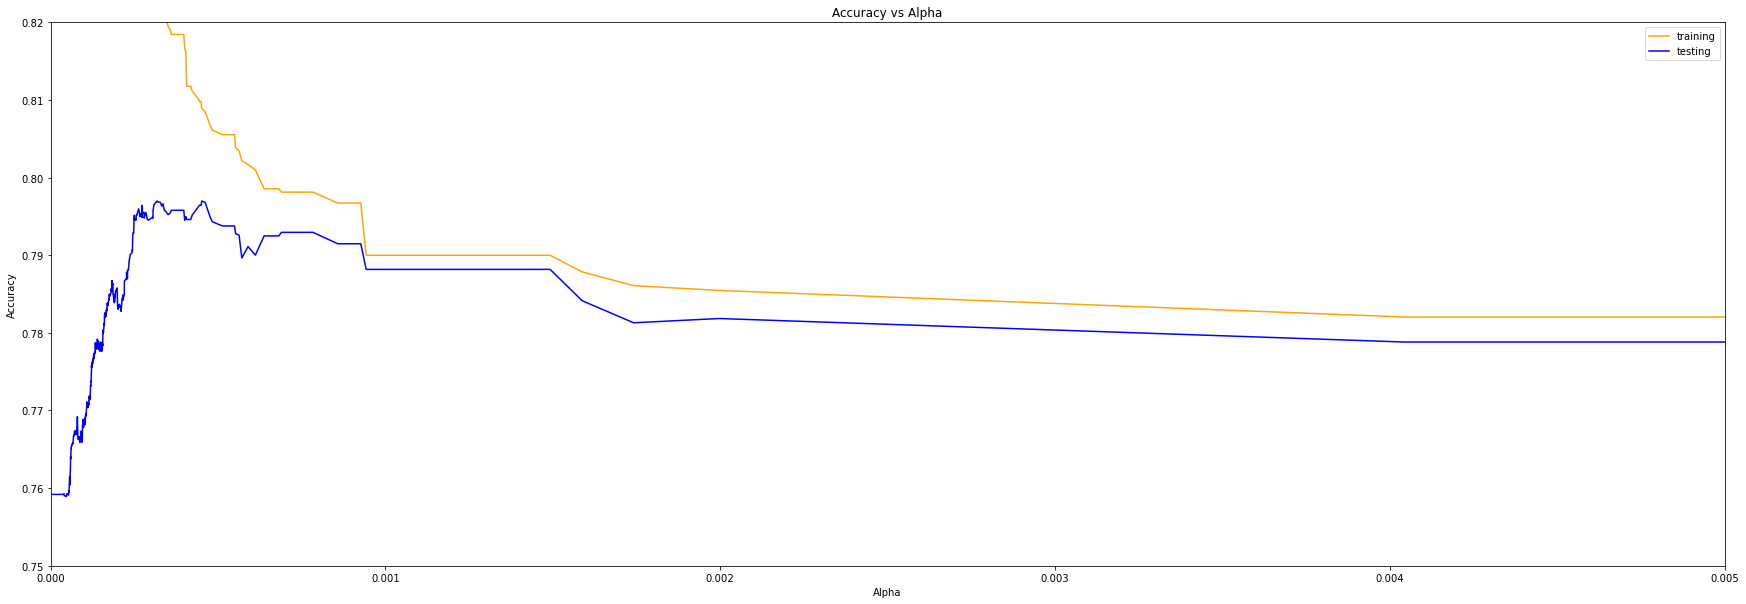

In [60]:
plt.figure(figsize = (30,10))
plt.plot(alphas,accuracy_train,c = 'orange',label = 'training')
plt.plot(alphas,accuracy_test, c = 'blue', label = 'testing')
plt.ylim(0.75,0.82)
plt.xlim(0,0.005)
plt.title('Accuracy vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()

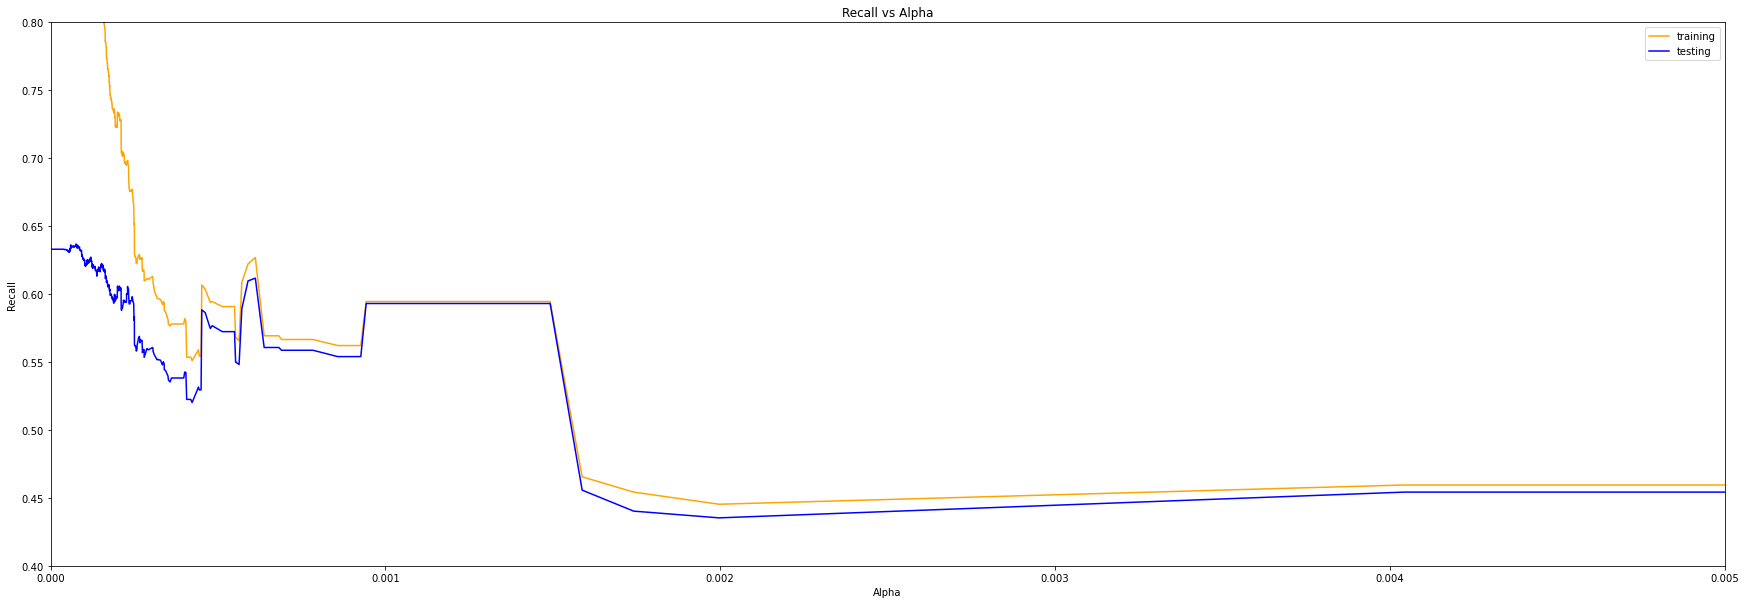

In [62]:
plt.figure(figsize = (30,10))
plt.plot(alphas,recall_train,c = 'orange',label = 'training')
plt.plot(alphas,recall_test, c = 'blue', label = 'testing')
plt.title('Recall vs Alpha')
plt.ylim(0.4,0.8)
plt.xlim(0,0.005)
plt.xlabel('Alpha')
plt.ylabel('Recall')
plt.legend()

In [63]:
pruned_tree = tree.DecisionTreeClassifier(random_state = 2021,
                                         ccp_alpha = 0.0005)
pruned_tree.fit(x_train, y_train)
# plt.figure(figsize = (40,40))
# tree.plot_tree(tree_clf,filled = True)

y_pred = pruned_tree.predict(x_test)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

[[6684  791]
 [1452 1978]]
0.7943145346171481
0.7143373058866017
0.5766763848396501


In [69]:
y.sum()

8586

[Text(2271.857142857143, 1549.26, 'management_clean_Missing <= 0.5\ngini = 0.432\nsamples = 16356\nvalue = [11200, 5156]\nclass = Yes'),
 Text(1421.5714285714287, 1386.18, 'lon_deg <= 8.092\ngini = 0.293\nsamples = 11777\nvalue = [9681, 2096]\nclass = Yes'),
 Text(930.0, 1223.1, 'crucialness <= 0.11\ngini = 0.402\nsamples = 3944\nvalue = [2843, 1101]\nclass = Yes'),
 Text(425.14285714285717, 1060.02, 'local_population_1km <= 395.5\ngini = 0.228\nsamples = 1145\nvalue = [995, 150]\nclass = Yes'),
 Text(212.57142857142858, 896.94, 'management_clean_Direct Government Operation <= 0.5\ngini = 0.493\nsamples = 82\nvalue = [36, 46]\nclass = No'),
 Text(106.28571428571429, 733.86, 'gini = 0.483\nsamples = 59\nvalue = [35, 24]\nclass = Yes'),
 Text(318.8571428571429, 733.86, 'gini = 0.083\nsamples = 23\nvalue = [1, 22]\nclass = No'),
 Text(637.7142857142858, 896.94, 'local_population_1km <= 4998.0\ngini = 0.177\nsamples = 1063\nvalue = [959, 104]\nclass = Yes'),
 Text(531.4285714285714, 733.86

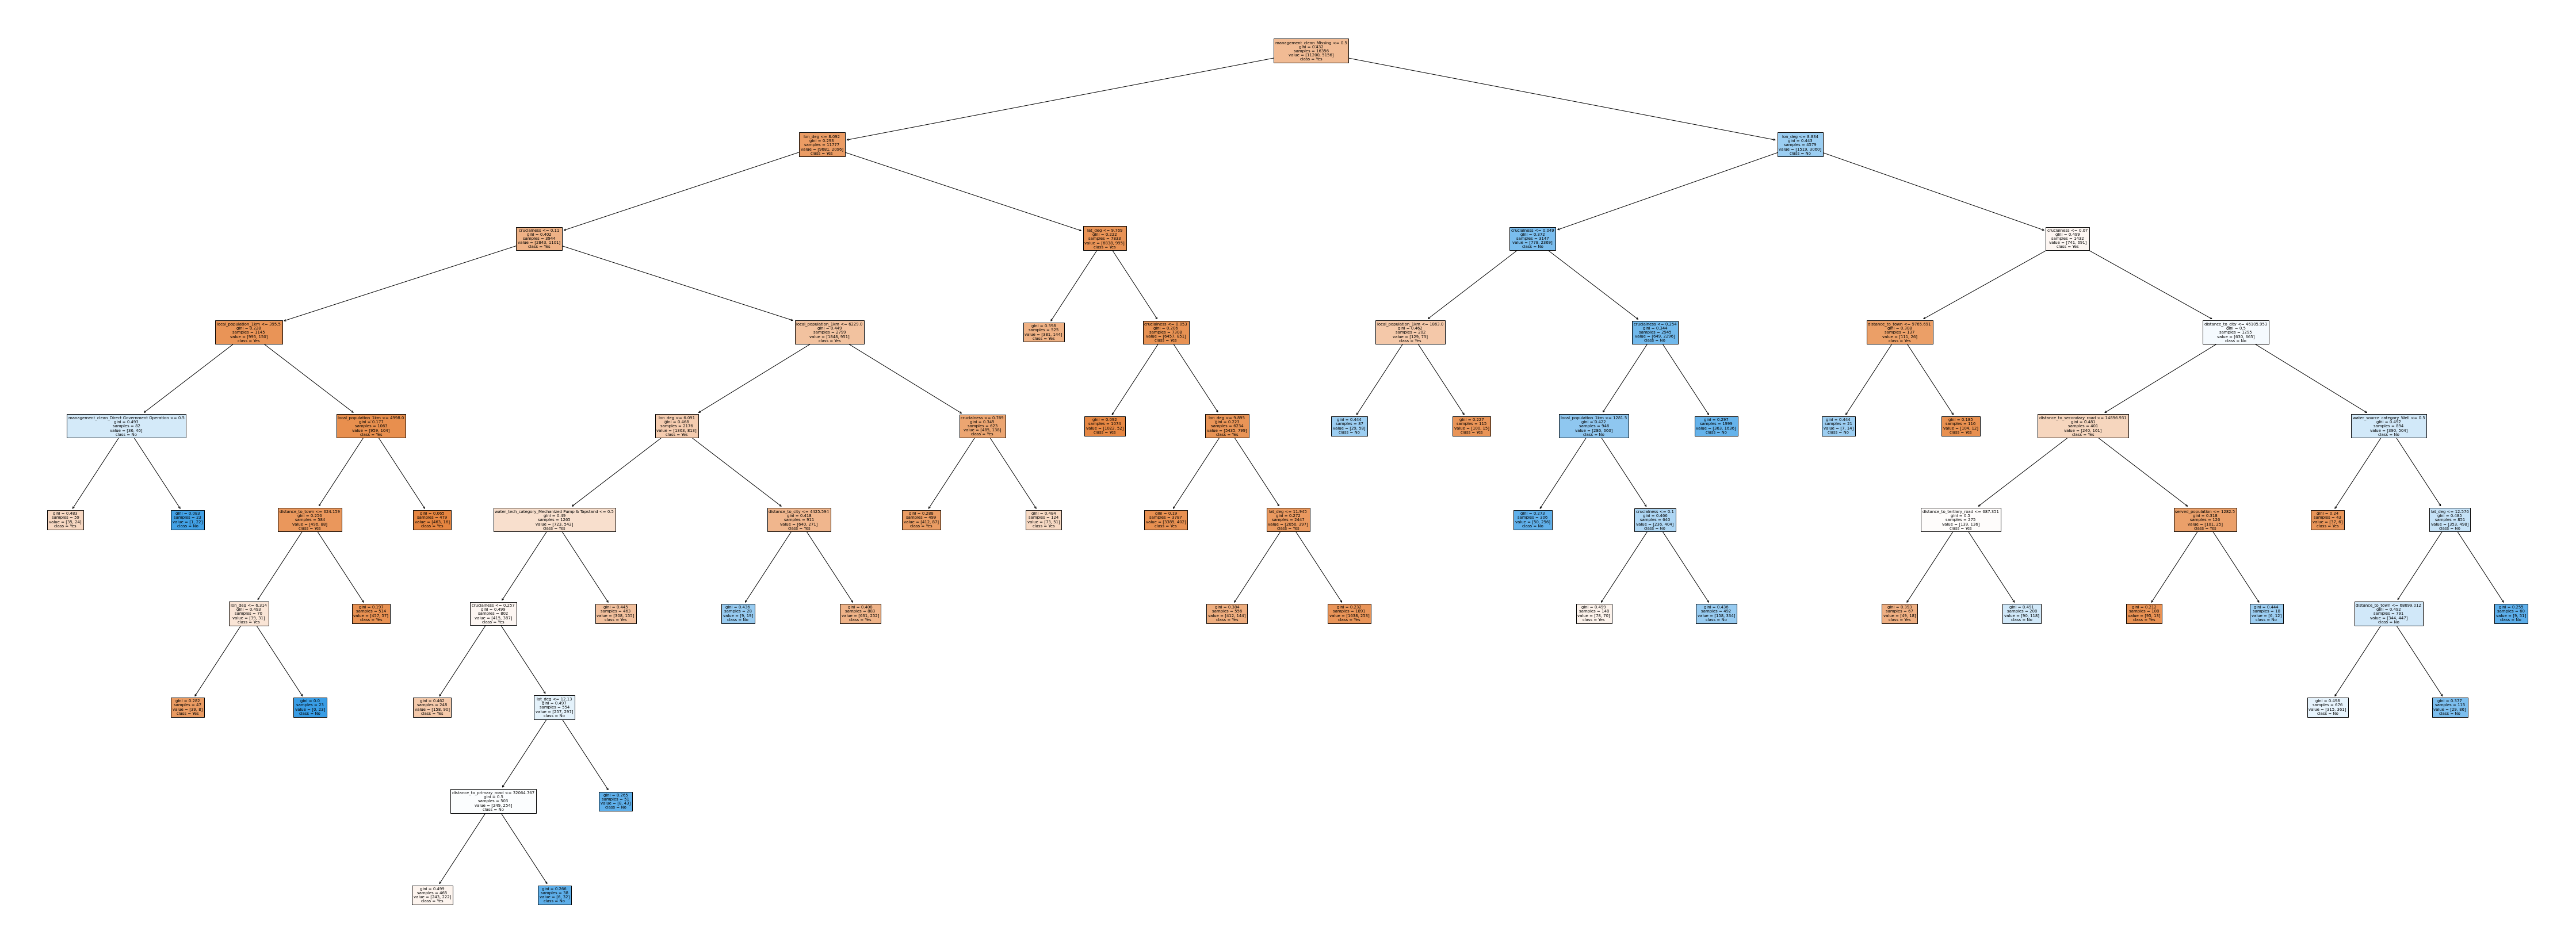

In [77]:
plt.figure(figsize = (80,30))

tree.plot_tree(pruned_tree,
               class_names = ['Yes','No'],
               feature_names = pd.concat([dummies,data[conti_var1]],axis = 1).columns,
               filled = 'True')

In [64]:
pruned_tree1 = tree.DecisionTreeClassifier(random_state = 2021,
                                         ccp_alpha = 0.001)
pruned_tree1.fit(x_train, y_train)
# plt.figure(figsize = (40,40))
# tree.plot_tree(tree_clf,filled = True)

y_pred = pruned_tree1.predict(x_test)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

[[6561  914]
 [1396 2034]]
0.7881705639614855
0.6899592944369064
0.5930029154518951


In [79]:
####### Grid-Search CV (Pre-Pruning) #######
## Fit Model (Full Tree) ##
tree_clf = tree.DecisionTreeClassifier(criterion = 'gini',
                                        random_state = 2021)


tree_clf.fit(x_train, y_train)

y_pred = tree_clf.predict(x_test)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

## Grid-Search CV (Pre-Pruning) ##
params = {'max_depth':list(range(5,31,5)),
          'min_samples_split':list(range(10,101,10)),
          'min_samples_leaf':list(range(10,101,10))}

gcv = model_selection.GridSearchCV(tree_clf, params,
                                   n_jobs = 4)
gcv.fit(x_train, y_train)

[[6108 1367]
 [1259 2171]]
0.7591930307198532
0.613623516110797
0.6329446064139942


GridSearchCV(estimator=DecisionTreeClassifier(random_state=2021), n_jobs=4,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [10, 20, 30, 40, 50, 60, 70, 80,
                                              90, 100],
                         'min_samples_split': [10, 20, 30, 40, 50, 60, 70, 80,
                                               90, 100]})

In [82]:
gcv_pre_pruned = gcv.best_estimator_
gcv_pre_pruned.fit(x_train, y_train)
y_pred = gcv_pre_pruned.predict(x_test)
y_pred_train = gcv_pre_pruned.predict(x_train)

print('Training Set results:')
print(metrics.confusion_matrix(y_train,y_pred_train))
print('Accuracy Score:',metrics.accuracy_score(y_train,y_pred_train))
print('Precision Score:',metrics.precision_score(y_train,y_pred_train))
print('Recall Score:',metrics.recall_score(y_train,y_pred_train))

print('\nTesting Set results:')
print(metrics.confusion_matrix(y_test,y_pred))
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))
print('Precision Score:',metrics.precision_score(y_test,y_pred))
print('Recall Score:',metrics.recall_score(y_test,y_pred))

Training Set results:
[[10132  1068]
 [ 1880  3276]]
Accuracy Score: 0.8197603325996576
Precision Score: 0.7541436464088398
Recall Score: 0.6353762606671839

Testing Set results:
[[6619  856]
 [1390 2040]]
Accuracy Score: 0.7940394314534617
Precision Score: 0.7044198895027625
Recall Score: 0.5947521865889213


In [110]:
## Split into Training, Validation and Testing Data
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,
                                                                    test_size = 0.4, random_state = 2021)

In [111]:
####### Grid-Search CV (Post-Pruning) #######
## Fit Model (Full Tree) ##
tree_clf = tree.DecisionTreeClassifier(criterion = 'gini',
                                        random_state = 2021)

tree_clf.fit(x_train, y_train)

y_pred = tree_clf.predict(x_test)
y_pred_train = tree_clf.predict(x_train)

print('Training Set results:')
print(metrics.confusion_matrix(y_train,y_pred_train))
print('Accuracy Score:',metrics.accuracy_score(y_train,y_pred_train))
print('Precision Score:',metrics.precision_score(y_train,y_pred_train))
print('Recall Score:',metrics.recall_score(y_train,y_pred_train))

print('\nTesting Set results:')
print(metrics.confusion_matrix(y_test,y_pred))
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))
print('Precision Score:',metrics.precision_score(y_test,y_pred))
print('Recall Score:',metrics.recall_score(y_test,y_pred))

alphas = tree_clf.cost_complexity_pruning_path(x_train,y_train)['ccp_alphas']
print('\n',len(alphas))

Training Set results:
[[11200     0]
 [    5  5151]]
Accuracy Score: 0.9996943017852776
Precision Score: 1.0
Recall Score: 0.9990302560124127

Testing Set results:
[[6108 1367]
 [1259 2171]]
Accuracy Score: 0.7591930307198532
Precision Score: 0.613623516110797
Recall Score: 0.6329446064139942

 1124


In [116]:
params = {'ccp_alpha':alphas}
gcv_ccp = model_selection.GridSearchCV(tree_clf,params,n_jobs = 4)
gcv_ccp.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2021), n_jobs=4,
             param_grid={'ccp_alpha': array([0.00000000e+00, 2.03798810e-05, 2.03798810e-05, ...,
       7.42372259e-03, 8.78853606e-03, 9.69157939e-02])})

In [118]:
tree_postprune_cv = gcv_ccp.best_estimator_
tree_postprune_cv.fit(x_train, y_train)

y_pred = tree_postprune_cv.predict(x_test)
y_pred_train = tree_postprune_cv.predict(x_train)

print('Training Set results:')
print(metrics.confusion_matrix(y_train,y_pred_train))
print('Accuracy Score:',metrics.accuracy_score(y_train,y_pred_train))
print('Precision Score:',metrics.precision_score(y_train,y_pred_train))
print('Recall Score:',metrics.recall_score(y_train,y_pred_train))

print('\nTesting Set results:')
print(metrics.confusion_matrix(y_test,y_pred))
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))
print('Precision Score:',metrics.precision_score(y_test,y_pred))
print('Recall Score:',metrics.recall_score(y_test,y_pred))

Training Set results:
[[10387   813]
 [ 2298  2858]]
Accuracy Score: 0.8097945707997065
Precision Score: 0.7785344592754018
Recall Score: 0.5543056633048875

Testing Set results:
[[6869  606]
 [1614 1816]]
Accuracy Score: 0.796423658872077
Precision Score: 0.749793559042114
Recall Score: 0.5294460641399417
